# PROJECT :Unveiling the Android App Market: Analyzing Google Play Store Data

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import plotly
import plotly.graph_objs as go
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Performing EDA

In [ ]:
apps_with_duplicates = pd.read_csv('/content/apps.csv')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ',len(apps))
print(apps.info())
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7990,9109,DZ-JOKER,GAME,NaN,6,18.0,100+,Free,0,Everyone,Arcade,"May 4, 2017",1,2.3 and up
166,166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,23.0,"5,000,000+",Free,0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
6158,7202,ABAI CE Scanner,FAMILY,NaN,0,4.3,"1,000+",Free,0,Everyone,Education,"January 23, 2018",1.3,4.1 and up
1705,2173,SweetLand — Family Board Game,FAMILY,4.2,38,47.0,"1,000+",Paid,$0.99,Everyone,Casual;Pretend Play,"November 14, 2014",1.2,2.3.3 and up
4076,5023,Dashboard AE,AUTO_AND_VEHICLES,NaN,0,13.0,10+,Free,0,Everyone,Auto & Vehicles,"May 16, 2018",1255162018,6.0 and up


# Data Cleaning

In [ ]:
chars_to_remove = [',','$','+']
cols_to_clean = ['Installs','Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char,'')
    apps[col] = pd.to_numeric(apps[col])

# Distribution of app categories in market share

In [ ]:
plotly.offline.init_notebook_mode ( connected=False )
num_categories = len (apps ['Category'].unique() )
print ('Number of categories = ', num_categories)
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
data = [go.Bar(x = num_apps_in_category.index,  y = num_apps_in_category.values, )]
plotly.offline.iplot(data)

# Distribution of app ratings

In [ ]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ',avg_app_rating)
data = [go.Histogram(x = apps['Rating'])]
layout = {'shapes': [{'type' :'line','x0': avg_app_rating,'y0': 0,'x1': avg_app_rating,'y1': 1000, 'line': { 'dash': 'dashdot'}}]}
plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


# App size and cost correlation

          Category     a
0           FAMILY  1512
1             GAME   832
2            TOOLS   626
3  PERSONALIZATION   276
4        LIFESTYLE   269
5          MEDICAL   266
6          FINANCE   258


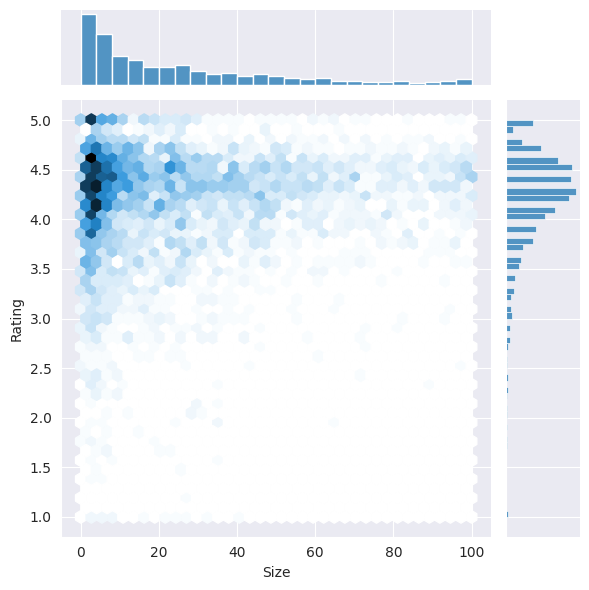

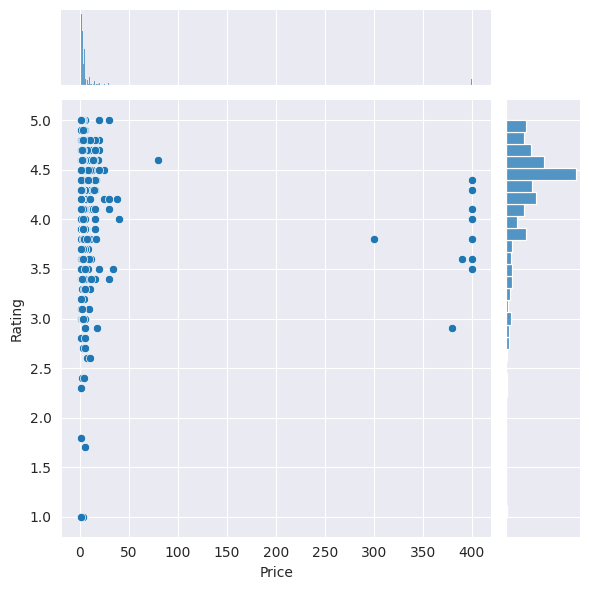

In [ ]:
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
dfa=apps_with_size_and_rating_present['Category'].value_counts().to_frame(name = 'a')
print(dfa[dfa['a']>=250].reset_index())
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# App pricing based on category classification

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


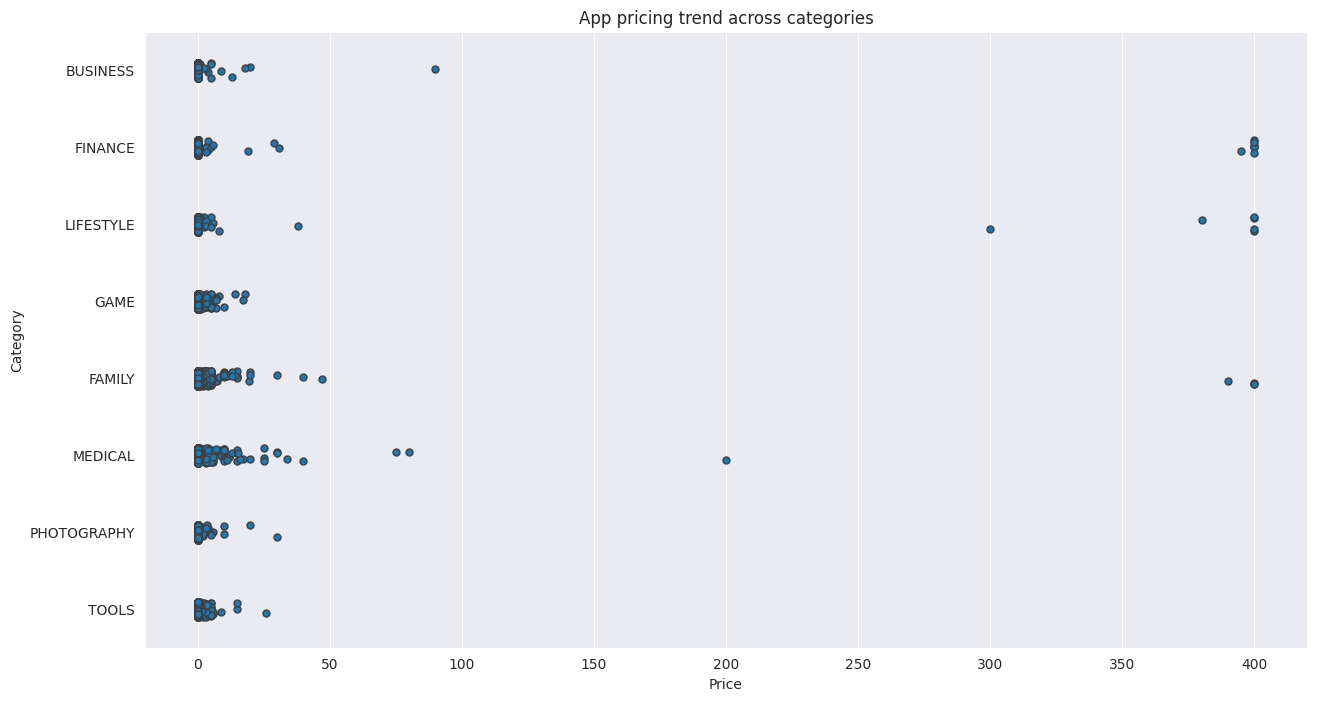

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
popular_app_cats = apps[apps["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x ='Price', y = 'Category',data=popular_app_cats, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

In [ ]:

apps_above_200.head(4)


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99


# Exclude expensive, low-quality apps from consideration

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

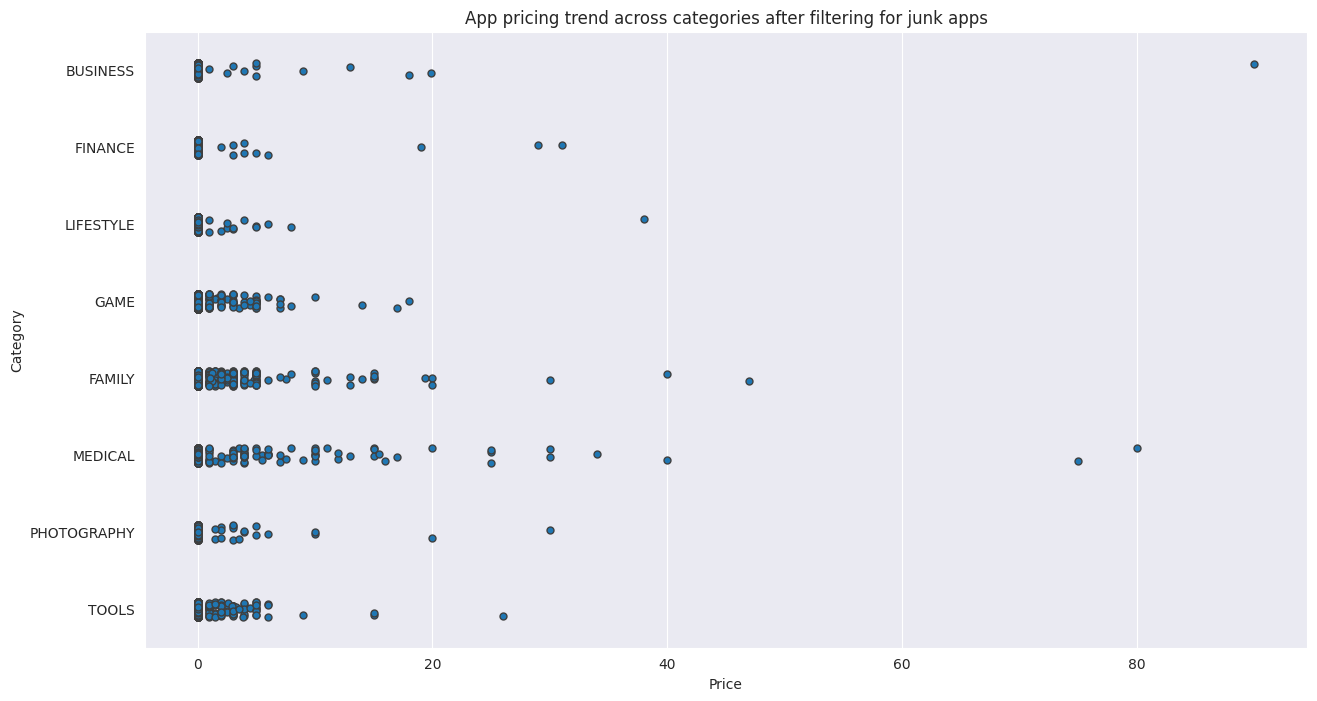

In [ ]:
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,jitter=True,linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# Analyzing popularity of paid apps vs free apps

In [ ]:
trace0 = go.Box(y=apps[apps['Type'] == 'Paid']['Installs'],name = 'Paid')
trace1 = go.Box(y=apps[apps['Type'] == 'Free']['Installs'],name = 'Free')
layout = go.Layout(title = "Number of downloads of paid apps vs. free apps",yaxis = dict( type = 'log'))
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [ ]:
reviews_df = pd.read_csv('/content/user_reviews.csv')
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

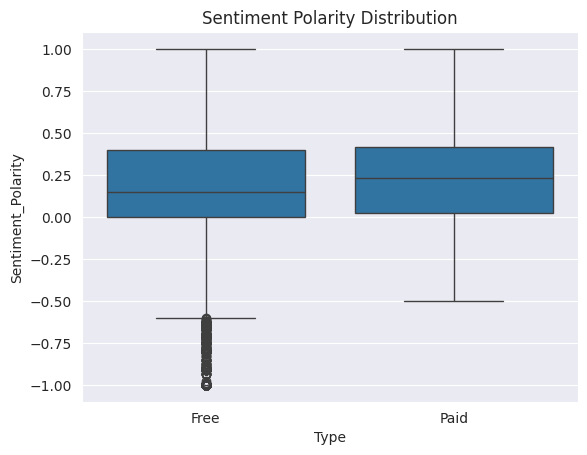

In [ ]:

ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
